In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:

def autocorr(x, unbiased=False):
    result = np.correlate(x, x, mode='full')
    n = int(result.size/2)
    nn = [n if unbiased else n - i + 1 for i in range(0, n + 1)]
    return result[int(result.size/2):] / nn

In [72]:
def plot_autocorr(func, filename):
    xs = np.linspace(0, 3, 1000)
    ys = func(xs)
    fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)

    ax.set(xlabel='t/s', ylabel='A')
    ax.grid()
    ax.plot(xs, ys, label='Signal')
    ax.legend()

    ax1.set(xlabel='$\\tau / \mathrm{s}$', ylabel='A')
    ax1.grid()
    ax1.plot(xs, autocorr(ys), label='Unbiased')
    ax1.plot(xs, autocorr(ys, True), label='Biased')
    ax1.legend()
    fig.savefig(f'out/{filename}')

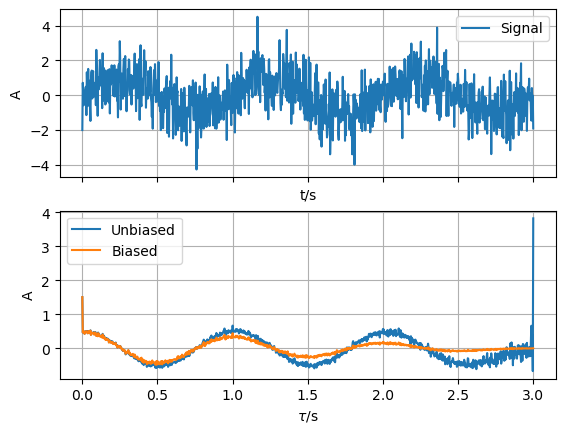

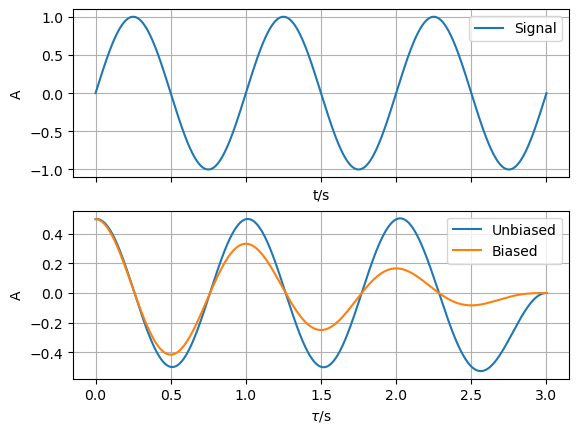

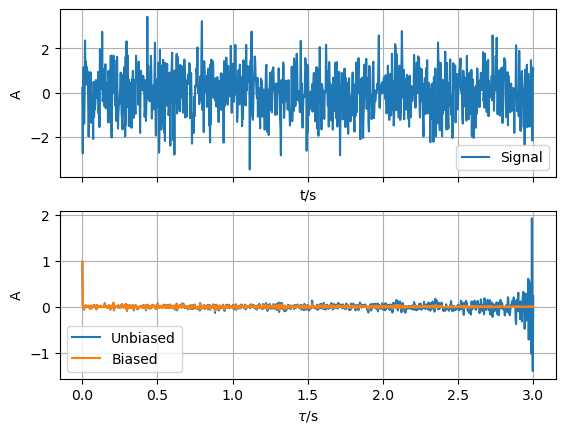

In [80]:
plot_autocorr(lambda xs : np.sin(np.pi * 2 * xs) + np.random.normal(size=len(xs)), 'sin_noise')
plot_autocorr(lambda xs : np.sin(np.pi * 2 * xs), 'pure_sin')
plot_autocorr(lambda xs : np.random.normal(size=len(xs)), 'pure_noise')